### <font color='bule'>第四期  分布图：26箱型图

## o新知识点

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### <font color=bule> 26/50 箱型图

箱线图，又叫做箱型图，箱图，是一种用于显示一个变量分布情况的统计图。其核心作用和直方图类似，我们在统计学和机器学习中也使用它来观察数据是否处于偏态，只不过直方图更著重于看到数据在整个取值区间上的分布，而箱线图更着重于观察变量上的重要分割点。箱线图能够精确地显示有关数据分布的关键数据节点，因此也常被用来作为查找异常值的方式。  
  
认识箱线图的第一步是学会阅读箱线图：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E7%AE%B1%E7%BA%BF%E5%9B%BE.PNG" align="center" />

其中上四分位数就是直方图中占75%数据量的位置，下四分位数就是直方图中占25%数据量的位置。    
那……，相同大小的箱子里数据量一定相同嘛？    

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E7%AE%B1%E5%9E%8B%E5%9B%BE.png' width=600>

这幅图的主要目的就是反映不同类型车辆的公路里程的分布状况

横坐标：不同类型的车辆      
纵坐标：公路里程     

### 1. 导入需要的绘图库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2.认识绘制箱型图的函数

**sns.boxplot**   
函数功能： 绘制箱型图以展示不同类别之间的分布  

重要参数：   
>x/y/hue：“data”或矢量数据中变量的名称     
>'data=None'：用于绘图的数据集   
>order/hue_order:控制箱型图顺序，list形式   
>'color=None':颜色    
>'saturation=0.75':色彩饱和度   
>'width=0.8':控制箱体宽度    
>'fliersize=5':异常值的大小    
>'linewidth=None'：线宽    
>'whis=1.5':四分位距的倍数，异常值的参考系     
>'notch=False'：在中位数两边显示切口    

In [96]:
# sns.boxplot?

### 3.绘制箱型图

In [3]:
df = pd.read_csv("data/mpg_ggplot2.csv")

In [3]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
df.shape

(234, 11)

#### 绘制简单箱型图

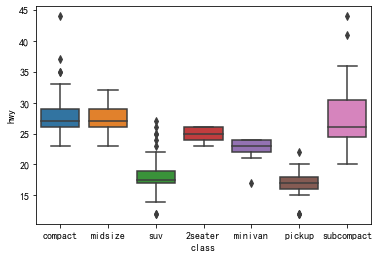

In [5]:
# 绘制多个箱型图
sns.boxplot(x='class', y='hwy', data=df
#             ,saturation=.9 
#             ,width=0.8
#             ,fliersize=2
#             ,linewidth=1
#             ,whis=1.5
#             ,notch=True
            );

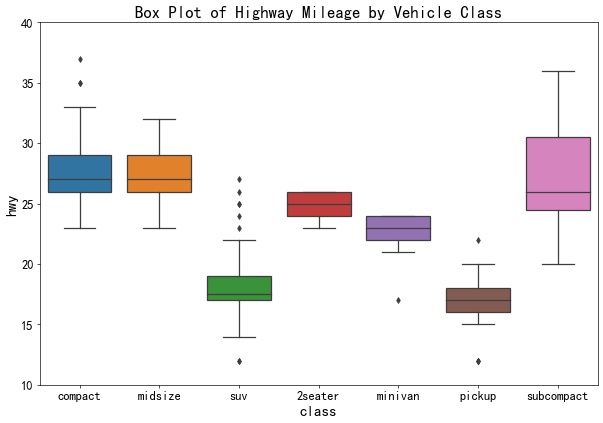

In [6]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df ) #绘制基础箱型图

#添加装饰
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=20) #添加标题
plt.xlabel('class',fontdict={'size':18}) #设定X轴标题大小
plt.ylabel('hwy',fontdict={'size':18}) #设定Y轴标题大小
plt.xticks(fontsize=15)  #设定X轴刻度大小
plt.yticks(fontsize=15)  #设定Y轴刻度大小
plt.ylim(10,40) #设定Y轴刻度范围
plt.show() #本地显示图形

#### 添加每个箱体中数据的个数
- 以compact此款汽车为例

In [7]:
#根据class对所有汽车进行分组
[*df[['hwy','class']].groupby('class')]

[('2seater',     hwy    class
  23   26  2seater
  24   23  2seater
  25   26  2seater
  26   25  2seater
  27   24  2seater), ('compact',      hwy    class
  0     29  compact
  1     29  compact
  2     31  compact
  3     30  compact
  4     26  compact
  5     26  compact
  6     27  compact
  7     26  compact
  8     25  compact
  9     28  compact
  10    27  compact
  11    25  compact
  12    25  compact
  13    25  compact
  14    25  compact
  141   29  compact
  142   27  compact
  169   25  compact
  170   27  compact
  171   25  compact
  172   27  compact
  186   27  compact
  187   29  compact
  188   31  compact
  189   31  compact
  190   26  compact
  191   26  compact
  192   27  compact
  193   30  compact
  194   33  compact
  195   35  compact
  196   37  compact
  197   35  compact
  207   29  compact
  208   26  compact
  209   29  compact
  210   29  compact
  211   24  compact
  212   44  compact
  213   29  compact
  214   26  compact
  215   29  compact
  2

In [22]:
#计算出每组的大小
df[['hwy','class']].groupby('class',sort=False).size()   # 2列,不排序

class
compact       47
midsize       41
suv           62
2seater        5
minivan       11
pickup        33
subcompact    35
dtype: int64

In [17]:
#计算每种类型汽车的中位数并转换为字典
{grp[0]:grp[1]['hwy'].median() for grp in df[['hwy','class']].groupby('class',sort=False)}  # grp为string+dataframe,grp[0]为string

{'compact': 27.0,
 'midsize': 27.0,
 'suv': 17.5,
 '2seater': 25.0,
 'minivan': 23.0,
 'pickup': 17.0,
 'subcompact': 26.0}

In [15]:
for grp in df[['hwy','class']].groupby('class',sort=False):
    print(grp[1])  #  grp为string+dataframe,grp[1]为dataframe

     hwy    class
0     29  compact
1     29  compact
2     31  compact
3     30  compact
4     26  compact
5     26  compact
6     27  compact
7     26  compact
8     25  compact
9     28  compact
10    27  compact
11    25  compact
12    25  compact
13    25  compact
14    25  compact
141   29  compact
142   27  compact
169   25  compact
170   27  compact
171   25  compact
172   27  compact
186   27  compact
187   29  compact
188   31  compact
189   31  compact
190   26  compact
191   26  compact
192   27  compact
193   30  compact
194   33  compact
195   35  compact
196   37  compact
197   35  compact
207   29  compact
208   26  compact
209   29  compact
210   29  compact
211   24  compact
212   44  compact
213   29  compact
214   26  compact
215   29  compact
216   29  compact
217   29  compact
218   29  compact
219   23  compact
220   24  compact
     hwy    class
15    24  midsize
16    25  midsize
17    23  midsize
32    27  midsize
33    30  midsize
34    26  midsize
35    29  

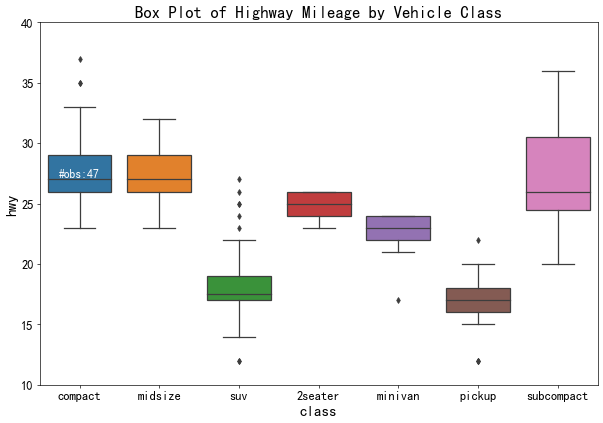

In [29]:
#添加compact汽车的观察数量

plt.figure(figsize=(12,8), dpi= 60)#创建画布
sns.boxplot(x='class', y='hwy', data=df) #绘制基础箱型图  ,,每一个文字标签其实对应0123

xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()] #横坐标刻度标签
# xticklabels :['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

medians_dict={grp[0]:grp[1]['hwy'].median() for grp in df.groupby('class',sort=False)} #每种类型汽车对应中位数的字典
nums = df[['hwy','class']].groupby('class',sort=False).size().values #每种类型车的数量，计数图中区别可见，不排序才能对应上

#添加compact汽车的观察数量
plt.text(range(len(nums))[0],medians_dict[xticklabels[0]],'#obs:'+str(nums[0])  # 第一个,画在中位线上
         ,horizontalalignment='center'
         ,verticalalignment='bottom'
         ,fontdict={'size':14,'color':'w'})

#添加装饰
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=20) #添加标题
plt.xlabel('class',fontdict={'size':18}) #设定X轴标题大小
plt.ylabel('hwy',fontdict={'size':18}) #设定Y轴标题大小
plt.xticks(fontsize=15)  #设定X轴刻度大小
plt.yticks(fontsize=15)  #设定Y轴刻度大小
plt.ylim(10,40) #设定Y轴刻度范围
plt.show() #本地显示图形

#### 绘制目标图形

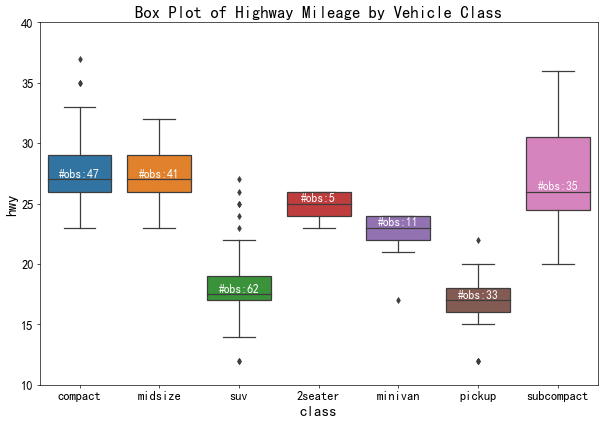

In [24]:
plt.figure(figsize=(12,8), dpi= 60)#创建画布
sns.boxplot(x='class', y='hwy', data=df) #绘制基础箱型图

xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()] #横坐标刻度标签
medians_dict={grp[0]:grp[1]['hwy'].median() for grp in df.groupby('class',sort=False)} #每种类型汽车的中位数
nums = df[['hwy','class']].groupby('class',sort=False).size().values #每种类型车的数量，不排序才能对应上

#添加所有类型汽车的观察数量
for i in range(len(nums)):
    plt.text(i,medians_dict[xticklabels[i]],'#obs:'+str(nums[i])   
             ,horizontalalignment='center'
             ,verticalalignment='bottom'
             ,fontdict={'size':14,'color':'w'})

#添加装饰
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=20) #添加标题
plt.xlabel('class',fontdict={'size':18}) #设定X轴标题大小
plt.ylabel('hwy',fontdict={'size':18}) #设定Y轴标题大小
plt.xticks(fontsize=15)  #设定X轴刻度大小
plt.yticks(fontsize=15)  #设定Y轴刻度大小
plt.ylim(10,40) #设定Y轴刻度范围
plt.show() #本地显示图形

#### 源码解读

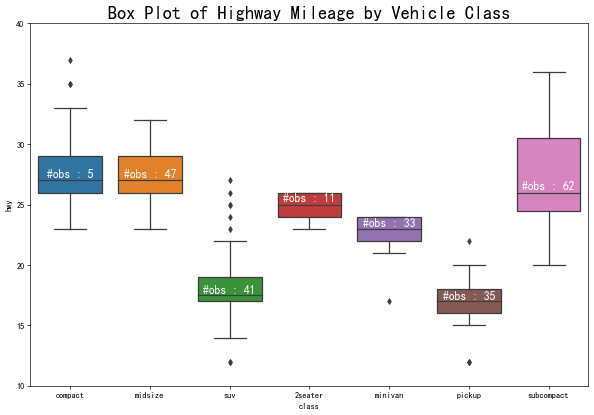

In [31]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df, notch=False) #绘制基础箱型图

# Add N Obs inside boxplot (optional) 
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)} #根据group_col分组，计算每组中y的中位数字典
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()] #提取当前子图中的X轴刻度标签  
    n_obs = df.groupby(group_col)[y].size().values  ##根据group_col分组，获取每组的数量  
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs): #对每种汽车添加文本   
        plt.text(x, medians_dict[xticklabel]*1.01, 
                 "#obs : "+str(n_ob), horizontalalignment='center', 
                 fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')  #把每种类型汽车的观察数量添加到箱型图中  

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22) #添加标题
plt.ylim(10, 40) #设定Y轴刻度范围
plt.show() #本地显示图形

到这里，相信细心的你一定发现这里的代码是有问题的~~~~

那我们一起来看一下，问题出在哪里！！！

首先可以确定的是箱型图的绘制是没有问题的，那就是添加文本的时候顺序出错了~

In [32]:
#统计每种类型汽车的数量
df['class'].value_counts()  #顺序按计数大小

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

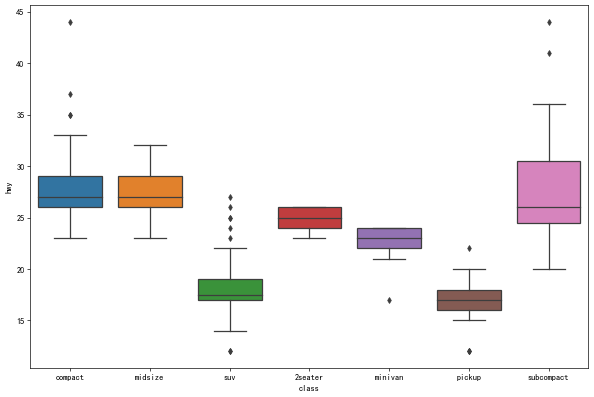

In [33]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df, notch=False) #绘制基础箱型图
xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()] #箱型图X轴刻度标签

In [34]:
#这是箱型图中X轴的刻度标签顺序
xticklabels 

['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup', 'subcompact']

In [35]:
group_col='class'
y='hwy'

In [36]:
#这是每种汽车的中位数，groupby顺序自动排
medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
medians_dict

{'2seater': 25.0,
 'compact': 27.0,
 'midsize': 27.0,
 'minivan': 23.0,
 'pickup': 17.0,
 'subcompact': 26.0,
 'suv': 17.5}

In [37]:
#这是每种汽车的数量 groupby顺序自动排
n_obs = df.groupby(group_col)[y].size().values
n_obs

array([ 5, 47, 41, 11, 33, 35, 62], dtype=int64)

In [38]:
df.groupby(group_col)[y].size() #groupby顺序自动排

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
Name: hwy, dtype: int64

In [39]:
[*zip(enumerate(xticklabels), n_obs)]  #顺序按列表出现先后

[((0, 'compact'), 5),
 ((1, 'midsize'), 47),
 ((2, 'suv'), 41),
 ((3, '2seater'), 11),
 ((4, 'minivan'), 33),
 ((5, 'pickup'), 35),
 ((6, 'subcompact'), 62)]

到这里，可以发现：xticklabels，medians_dict，n_obs三者的顺序是不一致的

解决办法就是把三者顺序统一

- 方法一：改变原箱型图的xticklabels的顺序，使其与medians_dict和n_obs的顺序一致

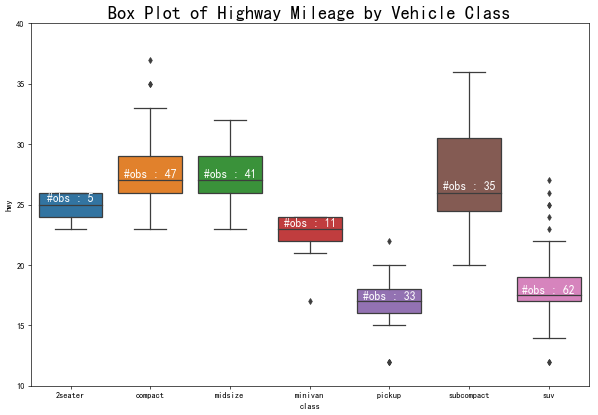

In [54]:
#修正后的源码1
# Draw Plot
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df, notch=False
            ,order=['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact','suv']) #绘制基础箱型图，改变原按出现顺序

# Add N Obs inside boxplot (optional) 
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)} # 有排序
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()] #同上绘图部分
    n_obs = df.groupby(group_col)[y].size().values  # 有排序
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, 
                 "#obs : "+str(n_ob), horizontalalignment='center', 
                 fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')  #把每种类型汽车的观察数量添加到箱型图中  

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22) #添加标题
plt.ylim(10, 40) #设定Y轴刻度范围
plt.show() #本地显示图形

- 方法二：改变medians_dict和n_obs的顺序，使其与xticklabels保持一致

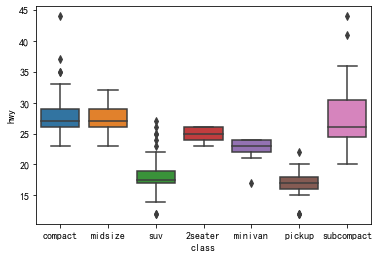

In [40]:
sns.boxplot(x='class', y='hwy', data=df, notch=False); 
#绘制基础箱型图的时候是没有设定顺序的

In [41]:
medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col,sort=False)}#groupby默认sort=True，是排序的
medians_dict

{'compact': 27.0,
 'midsize': 27.0,
 'suv': 17.5,
 '2seater': 25.0,
 'minivan': 23.0,
 'pickup': 17.0,
 'subcompact': 26.0}

In [42]:
df.groupby(group_col,sort=False)[y].size()

class
compact       47
midsize       41
suv           62
2seater        5
minivan       11
pickup        33
subcompact    35
Name: hwy, dtype: int64

In [59]:
n_obs = df.groupby(group_col,sort=False)[y].size().values
n_obs

array([47, 41, 62,  5, 11, 33, 35], dtype=int64)

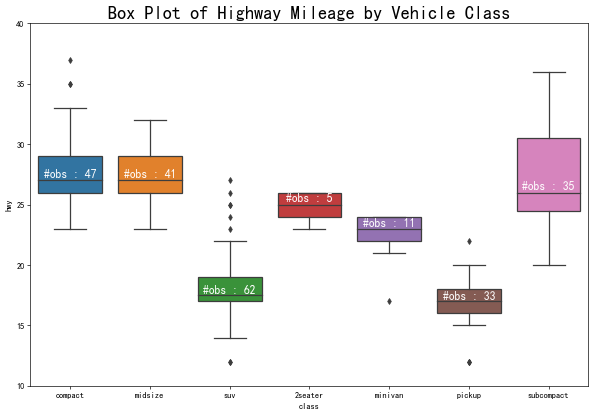

In [43]:
#修正后的源码2
# Draw Plot
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df, notch=False) #绘制基础箱型图

# Add N Obs inside boxplot (optional) 
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col,sort=False)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col,sort=False)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, 
                 "#obs : "+str(n_ob), horizontalalignment='center', 
                 fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')  #把每种类型汽车的观察数量添加到箱型图中  

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22) #添加标题
plt.ylim(10, 40) #设定Y轴刻度范围
plt.show() #本地显示图形

### 4.图形解读

### <font color='bule'>27/50 包点+箱型图（Dot + Box Plot）

包点+箱型图就是把包点图和箱型图结合起来的图形

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week4%20Distribution/%E5%8C%85%E7%82%B9%2B%E7%AE%B1%E5%BD%A2%E5%9B%BE.png' width=600>

- 横坐标：汽车类型
- 纵坐标：公路里程/加仑 
- 图例：气缸数

### 1.导入绘图需要的包

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

### 2.认识绘制包点+箱型图的函数

**sns.boxplot**   
函数功能： 绘制箱型图以展示不同类别之间的分布  

重要参数：   
>x/y/hue：“data”或矢量数据中变量的名称     
>'data=None'：用于绘图的数据集   
>order/hue_order:控制箱型图顺序，list形式   
>'color=None':颜色    
>'saturation=0.75':色彩饱和度   
>'width=0.8':控制箱体宽度    
>'fliersize=5':异常值的大小    
>'linewidth=None'：线宽    
>'whis=1.5':四分位距的倍数，异常值的参考系     
>'notch=False'：在中位数两边显示切口    

**sns.stripplot**   
函数功能：绘制含有分类变量的散点图   

重要参数：   
>x/y/hue：“data”或矢量数据中变量的名称     
>'data=None'：用于绘图的数据集   
>order/hue_order:控制箱型图顺序，list形式   
>'color=None':颜色  
>'jitter=True':沿分类轴抖动的大小，默认为True,可选项：float/True/1   
>'size=5'：散点的大小   
>"edgecolor='gray'"：散点边缘颜色    
>'linewidth=0'：散点线宽   

In [104]:
# sns.stripplot?

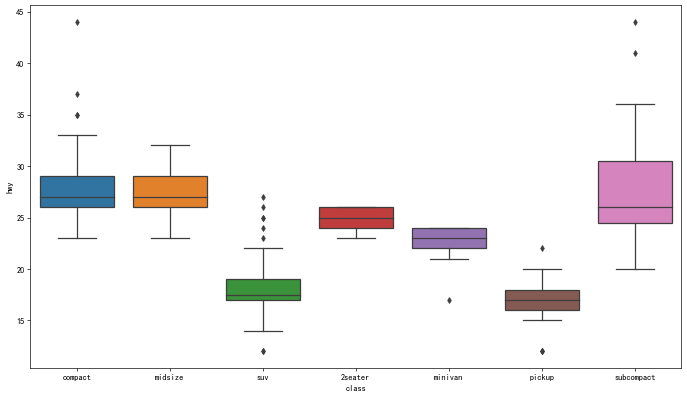

In [5]:
# 绘制简单散点图 
plt.figure(figsize=(14,8),dpi=60)
sns.boxplot(x='class', y='hwy', data=df
          # , hue='cyl' # 根据2个分类变量嵌套分组绘制一个箱型图
           );

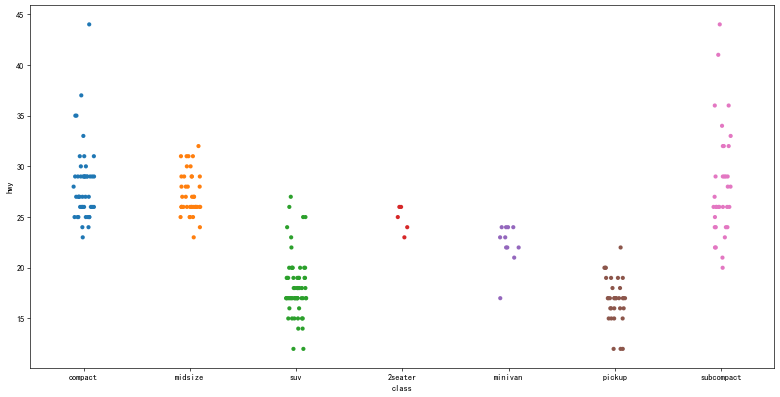

In [18]:
#绘制简单散点图
plt.figure(figsize=(16,8),dpi=60)
sns.stripplot(x='class', y='hwy', data=df
#              ,color='b'
#               ,alpha=.5
#               ,size=10
#               ,edgecolor='r'
#               ,linewidth=1
              ,jitter=True   # jitter=False为一直线，不抖动
             );

### 3.绘制包点+箱型图   

In [8]:
#导入数据集
df= pd.read_csv("data/mpg_ggplot2.csv")

In [9]:
df.head() #这个数据集我们已经非常熟悉了

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


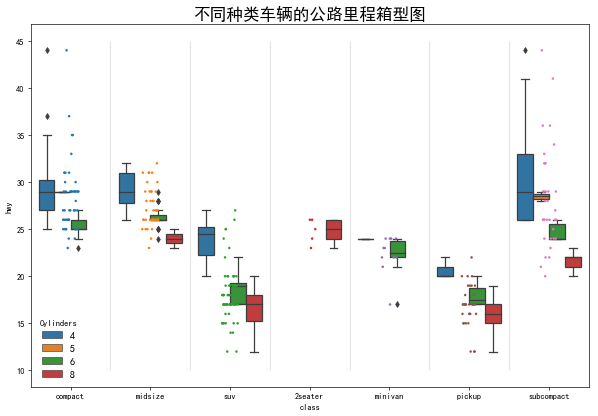

In [157]:
plt.figure(figsize=(12,8), dpi= 60) #创建画布
sns.boxplot(x='class', y='hwy', data=df, hue='cyl') #绘制箱型图
sns.stripplot(x='class', y='hwy', data=df, size=3, jitter=1) #绘制散点图,有抖动

#添加分割线（10，45）
for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

#添加装饰
plt.title('不同种类车辆的公路里程箱型图', fontsize=20) #添加标题
plt.legend(title='Cylinders',frameon=False,fontsize=12) #添加图例
plt.show()

源码解读

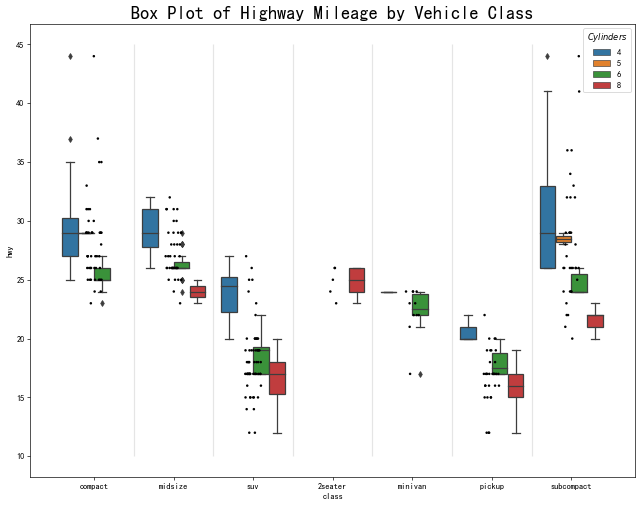

In [16]:
# Import Data
# df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv") #导入原始数据集

# Draw Plot
plt.figure(figsize=(13,10), dpi= 60) #创建画布 
sns.boxplot(x='class', y='hwy', data=df, hue='cyl') #绘制箱型图
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1) #绘制散点图

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2) #添加垂直分割线

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22) #添加标题
plt.legend(title='$Cylinders$') #添加图例
plt.show()  #本地显示

### 4.图像解读

### <font color='bule'>28/50 小提琴图（violin Plot）

小提琴图是箱形图的视觉替代。小提琴的形状或面积取决于其可观察的次数。但是，小提琴图很难阅读，在专业环境中不常用。

<img src='https://www.machinelearningplus.com/wp-content/uploads/2018/11/28_Violin_Plot_Seaborn-min-1024x788.png' width=600>

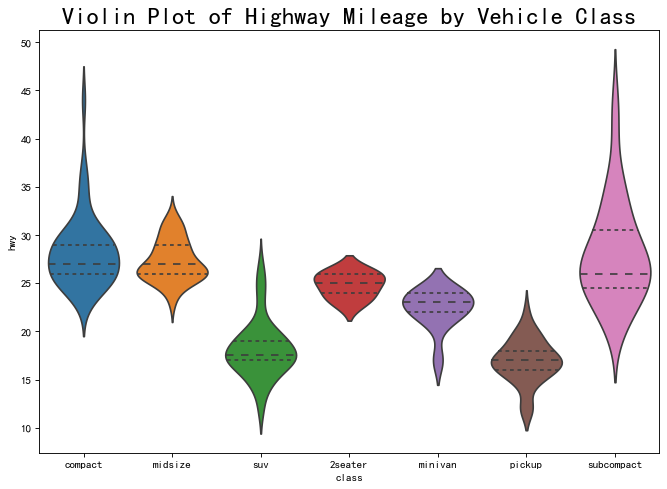

In [21]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()